# FreeCodeCamp Challenge 03: Medical Data Visualizer.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
df = pd.read_csv("medical_examination.csv")
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Initial data dimension
df.shape

(70000, 13)

### Calculating BMI and overweight of patients
BMI is calculated by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. The value 0 is setting for NOT overweight and the value 1 for overweight.

In [4]:
# BMI calculations
BMI = df["weight"] / ((df["height"] / 100) ** 2)

# Defining overweight
df["overweight"] = (BMI > 25).astype(int)
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
12409,17721,22369,2,159,80.0,130,90,3,1,0,1,1,1,1
22440,32053,14610,2,164,65.0,120,80,1,1,0,0,1,0,0
6332,9016,18971,1,155,71.0,120,80,1,1,0,0,1,0,1
6711,9576,19698,1,167,65.0,120,80,1,1,0,0,1,0,0
25910,36990,21969,2,176,94.0,120,80,2,2,0,0,0,0,1


### Normalizing data
The data is normalized by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is <= 1, then the value is 0. If the value is more than 1, then is setting at 1.

In [5]:
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
df["gluc"] = (df["gluc"] > 1).astype(int)
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
65980,94191,19715,1,154,45.0,140,90,1,0,0,0,1,0,0
63292,90373,19578,1,185,75.0,120,80,0,0,0,0,1,0,0
48239,68894,18766,1,158,82.0,150,90,0,1,0,0,1,1,1
38931,55583,23206,1,161,97.0,160,100,1,0,0,0,0,1,1
63244,90309,19647,1,180,76.0,120,80,0,0,0,0,1,0,0


### Drawing categorical plot

In [6]:
# DataFrame for cat plot using `pd.melt` and just the values from "active", "alco", "cholesterol", "gluc", "overweight" and "smoke"
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
df_cat.sample(5)

,cardio,variable,value
128678,0,alco,0
395021,1,smoke,0
157102,0,cholesterol,0
376720,0,smoke,0
334357,1,overweight,1


In [7]:
# Grouping and reformatting the data to split it by 'cardio', and showing the counts of each feature.
df_cat = pd.DataFrame(df_cat.groupby(["cardio" , "variable" , "value"])["value"].count())
df_cat.rename(columns={"value": "total"}, inplace=True)
df_cat.reset_index(inplace=True)
df_cat.sample(5)

,cardio,variable,value,total
3,0,alco,1,1941
14,1,alco,0,33156
9,0,overweight,1,19106
7,0,gluc,1,4127
6,0,gluc,0,30894


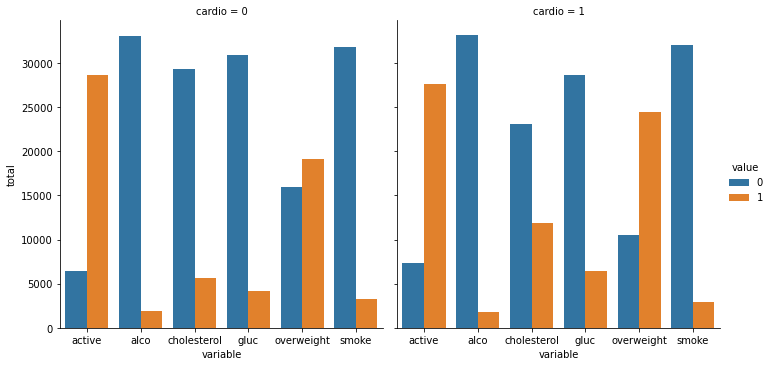

In [8]:
# Drawing catplot
catplot_figure = sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar")
plt.show()

In [9]:
# Saving figure
catplot_figure.savefig('catplot.png')

### Cleaning and filtering data for heatmap

In [10]:
# Dropping rows with non values
df = df.replace(to_replace="None", value=np.nan).dropna()

# Filters: 
# - Removing data with diastolic pressure (ap_lo) higher than systolic (ap_hi)
# - Removing data with height less than the 2.5th percentile and height higher than the 97.5th percentile
# - Removing data with weight less than the 2.5th percentile and weight higher than the 97.5th percentile

df_heat = df[
    (df["ap_lo"] <= df["ap_hi"]) & 
    (df["height"] >= df["height"].quantile(0.025)) & 
    (df["height"] <= df["height"].quantile(0.975)) & 
    (df["weight"] >= df["weight"].quantile(0.025)) & 
    (df["weight"] <= df["weight"].quantile(0.975))]

df_heat.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
21720,31019,20493,1,160,60.0,120,80,0,0,0,0,1,1,0
20755,29630,14464,1,170,70.0,120,70,0,0,0,0,1,0,0
21971,31382,15839,1,163,69.0,110,70,0,1,0,0,1,1,1
8210,11712,14422,1,171,80.0,110,60,0,1,1,1,1,0,1
52684,75167,19533,1,160,67.0,120,69,0,0,0,0,1,0,1


In [11]:
# Checking new data dimension
df_heat.shape

(63259, 14)

### Identifying correlations in the dataset

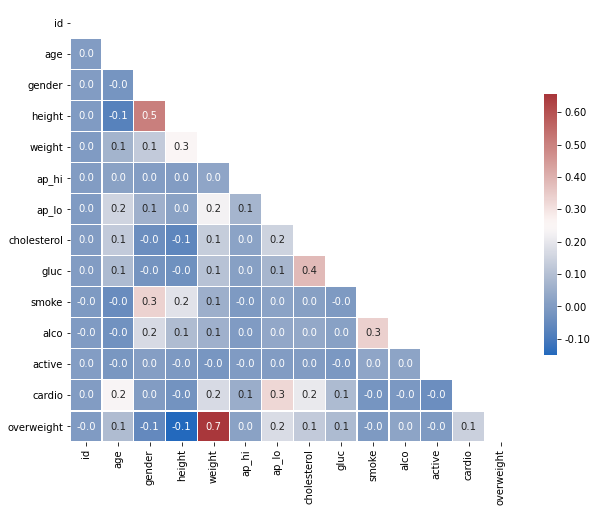

In [12]:
# Calculating the correlation matrix
corr = df_heat.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Drawing the heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap="vlag", fmt=".1f", linewidth=0.3, cbar_kws={"shrink": .6, "format": "%.2f"})
plt.show()

In [13]:
# Saving the figure
fig.savefig('heatmap.png')